In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
ds = xr.open_dataset('./waterhackweek_dalles_salmonfalls/waterhackweek_dalles_salmonfalls.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:           (downscale_method: 2, gcm: 10, outlets: 2, parameters: 4, rcp: 2, time: 54787)
Coordinates:
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2099-12-31
  * outlets           (outlets) |S256 b'TDA' b'BRN'
  * parameters        (parameters) object 'PRMS' 'calib_inverse' 'ORNL' 'NCAR'
  * downscale_method  (downscale_method) object 'bcsd' 'maca'
  * gcm               (gcm) object 'hadgem2-cc' 'hadgem2-es' ... 'ccsm4'
  * rcp               (rcp) object 'rcp45' 'rcp85'
Data variables:
    streamflow        (time, outlets, parameters, downscale_method, gcm, rcp) float64 ...

In [5]:
ds_sel = ds.sel(rcp='rcp85', downscale_method='maca', parameters='calib_inverse', outlets=b'TDA')

In [6]:
ds_sel

<xarray.Dataset>
Dimensions:           (gcm: 10, time: 54787)
Coordinates:
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2099-12-31
    outlets           |S256 b'TDA'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
  * gcm               (gcm) object 'hadgem2-cc' 'hadgem2-es' ... 'ccsm4'
    rcp               <U5 'rcp85'
Data variables:
    streamflow        (time, gcm) float64 ...

In [7]:
#Spread of flows in historical, present, and future scenarios [MEAN]

periods = {'Historical': slice('1950', '1979'), 'Present': slice('2000', '2029'), 'Future': slice('2070', '2099')}

df_mean = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').mean(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_mean = df_mean.append(pd.DataFrame(data))
    
df_mean.columns = df_mean.columns.str.capitalize()
df_mean.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max)

In [8]:
#Spread of flows in historical, present, and future scenarios [MAX]

periods = {'Historical': slice('1950', '1979'), 'Present': slice('2000', '2029'), 'Future': slice('2070', '2099')}

df_max = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').max(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_max = df_max.append(pd.DataFrame(data))
    
df_max.columns = df_max.columns.str.capitalize()
df_max.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max)

In [9]:
#Spread of flows in historical, present, and future scenarios [MIN]

df_min = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').min(dim='time').to_dataframe().reset_index()
    data['period'] = p
    df_min = df_min.append(pd.DataFrame(data))
    
df_min.columns = df_min.columns.str.capitalize()
df_min.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_min)

In [10]:
#Spread of flows in historical, present, and future scenarios [VARIABILITY]

df_var = pd.DataFrame()
                                                                                                   
for p in periods.keys():                                                                                              
    data = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').max(dim='time').to_dataframe().reset_index()
    data2 = ds_sel['streamflow'].sel(time=periods[p]).groupby('time.dayofyear').min(dim='time').to_dataframe().reset_index()
    #data['streamflow'] = 100*(data['streamflow'] - data2['streamflow'])/data['streamflow']
    data['streamflow'] = data['streamflow'] - data2['streamflow']

    data['period'] = p
    df_var = df_var.append(pd.DataFrame(data))
    
df_var.columns = df_var.columns.str.capitalize()
df_var.rename(columns={'Dayofyear':'Day of Year'}, inplace=True)
          
#sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_var)

[]

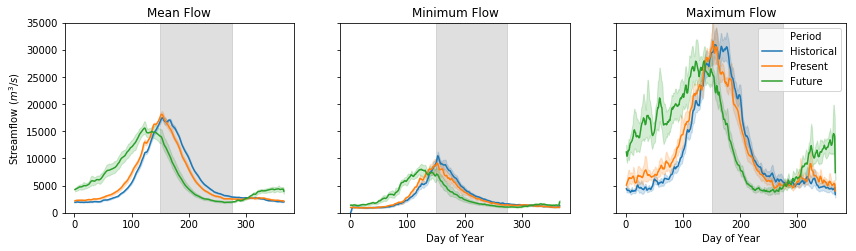

In [35]:
#Visualize the spread of flows

plt.figure(figsize=(14,3.5))

plt.subplot(1,3,1)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_mean)
plt.title('Mean Flow')
plt.ylim([0, 35000])
plt.ylabel('Streamflow ($m^{3} / s$)')
plt.xlabel('', visible=False)
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.legend().set_visible(False)

plt.subplot(1,3,2)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_min)
plt.title('Minimum Flow')
plt.ylim([0, 35000])
plt.ylabel('', visible=False)
plt.gca().set_yticklabels([])
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.legend().set_visible(False)


plt.subplot(1,3,3)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_max)
plt.title('Maximum Flow')
plt.ylim([0, 35000])
plt.ylabel('', visible=False)
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.gca().set_yticklabels([])



Text(0, 0.5, 'Range ($m^{3} / s$)')

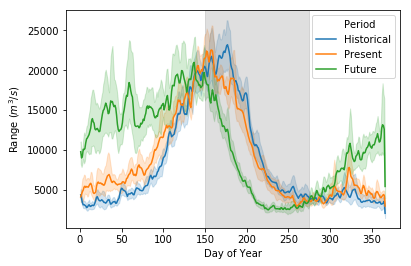

In [32]:
#Visualize the variability

plt.subplot(1,1,1)
sns.lineplot(x="Day of Year", hue="Period", y="Streamflow", data=df_var)
plt.axvspan(150, 275, alpha=0.25, color='gray')
plt.ylabel('Range ($m^{3} / s$)')

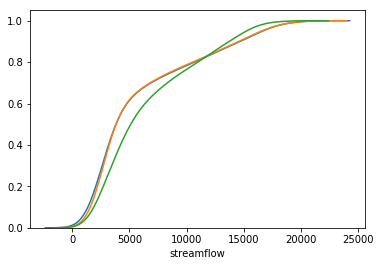

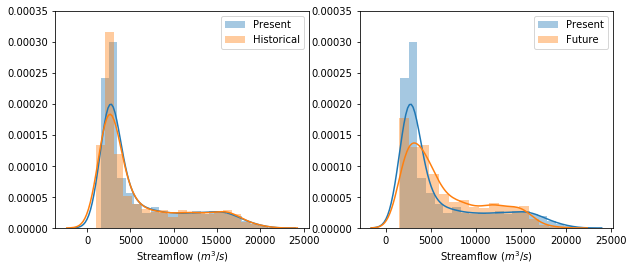

In [26]:
#Visualize the change in the flow pmf


freq = '7D'

data_hist = ds_sel['streamflow'].sel(time=periods['Historical']).resample(time=freq).mean(dim='time').mean(dim='gcm')
data_pres = ds_sel['streamflow'].sel(time=periods['Present']).resample(time=freq).mean(dim='time').mean(dim='gcm')
data_fut = ds_sel['streamflow'].sel(time=periods['Future']).resample(time=freq).mean(dim='time').mean(dim='gcm')


plt.figure()
sns.distplot(data_hist, kde_kws=dict(cumulative=True), label='Historical')
sns.distplot(data_pres, kde_kws=dict(cumulative=True), label='Present')
sns.distplot(data_fut, kde_kws=dict(cumulative=True), label='Future')

plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
sns.distplot(data_pres, label='Present')
sns.distplot(data_hist, label='Historical')
plt.ylim([0, 3.5e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()


plt.subplot(1,2,2)
sns.distplot(data_pres, label='Present')
sns.distplot(data_fut, label='Future')
plt.ylim([0, 3.5e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()


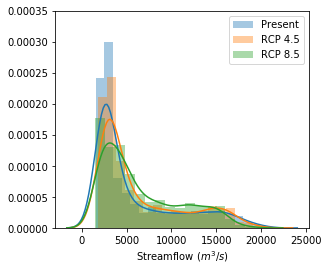

In [27]:
ds_sel_45 = ds.sel(rcp='rcp45', downscale_method='maca', parameters='calib_inverse', outlets=b'TDA')
data_fut_45 = ds_sel_45['streamflow'].sel(time=periods['Future']).resample(time=freq).mean(dim='time').mean(dim='gcm')


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data_pres, label='Present')
sns.distplot(data_fut_45, label='RCP 4.5')
sns.distplot(data_fut, label='RCP 8.5')
plt.ylim([0, 3.5e-4])
plt.xlabel('Streamflow ($m^{3} / s$)')
plt.legend()

In [ ]:
t1 = '1950'
t2 = '2100'

freq = '6M'

std_mean = ds_sel['streamflow'].sel(time=slice(t1, t2)).resample(time=freq).mean(dim=['time']).std(dim=['gcm']).plot(label='mean')
std_max = ds_sel['streamflow'].sel(time=slice(t1, t2)).resample(time=freq).max(dim=['time']).std(dim=['gcm']).plot(label='max')
std_min = ds_sel['streamflow'].sel(time=slice(t1, t2)).resample(time=freq).min(dim=['time']).std(dim=['gcm']).plot(label='min')
plt.legend()

In [ ]:
ds_sel['streamflow'].sel(time=slice('1970', '1999')).resample(time=freq).mean(dim=['time']).std(dim=['gcm']).groupby('time.month').mean().plot(label='historic')
ds_sel['streamflow'].sel(time=slice('2070', '2099')).resample(time=freq).mean(dim=['time']).std(dim=['gcm']).groupby('time.month').mean().plot(label='future')
plt.legend()

In [ ]:
slices = {'historic': slice('1970', '1999'),
         'future': slice('2070', '2099')}
std_gcms, mean_gcms, cv_gcms = {}, {}, {}
for scenario in ['historic', 'future']:
    seasonal_cycle_ten_gcms = ds_sel['streamflow'].sel(time=slices[scenario]).resample(time=freq).max(dim=['time']).groupby('time.month').mean(dim=['time'])
    std_gcms[scenario] = seasonal_cycle_ten_gcms.std(dim=['gcm'])
    mean_gcms[scenario] = seasonal_cycle_ten_gcms.mean(dim=['gcm'])
    cv_gcms[scenario] = std_gcms[scenario]/mean_gcms[scenario]

In [ ]:
std_gcms = seasonal_cycle_ten_gcms.std(dim=['gcm'])
mean_gcms = seasonal_cycle_ten_gcms.mean(dim=['gcm'])
cv_gcms = std_gcms/mean_gcms

In [ ]:
for scenario in ['historic', 'future']:
    mean_gcms[scenario].plot(label=scenario)
    plt.legend()

In [ ]:
for scenario in ['historic', 'future']:
    std_gcms[scenario].plot(label=scenario)
    plt.legend()

In [ ]:
for scenario in ['historic', 'future']:
    cv_gcms[scenario].plot(label=scenario)
    plt.legend()